In [2]:
# <!-- collapse=True -->
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# K-means

* On part d'un nuage de points [ (x1, y1), ...] (D-dimensions)
* On veut ranger les points dans k catégories
* Chaque catégorie est définie par les coordonnées d'un point "centre"
* Le point i est rangé dans la catégorie dont le centre est le plus proche
    - Rq: ceci revient à découper l'espace par un diagrame de Voronoi
* La question devient alors: Comment trouver les k point "centre" qui distingue au mieux les points ?
    - distingue ?
* une catégorie est stable si son point 'centre' est le barycentre de l'ensemble de ses points
* On procède par itérations

http://sherrytowers.com/2013/10/24/k-means-clustering/

https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means

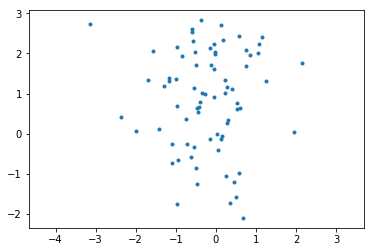

In [3]:
# data
X1 = np.random.normal(loc=0.0, scale=1.0, size=60)
Y1 = np.random.normal(loc=1.0, scale= 1., size=60)

X2 = np.random.normal(loc=0.0, scale=.6, size=15)
Y2 = np.random.normal(loc=0.0, scale= 1, size=15)

X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

        
plt.plot(X, Y, '.')
plt.axis('equal');

In [85]:
## Tentative d'alogrithme 1:

In [86]:
xy_bary = [ [np.min(x), np.min(Y)], [np.max(X), np.max(Y)] ]

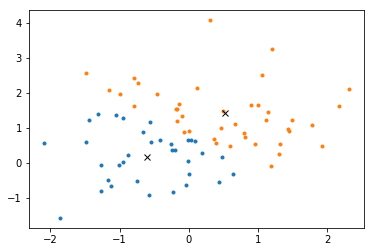

In [96]:
# trie
cat = []
for x, y in zip(X, Y):
    d = []
    for xy0 in xy_bary:
        distance = (x-xy0[0])**2 + (y-xy0[1])**2
        d.append( distance ) 
    i = np.argmin(d)
    cat.append(i)
    
cat = np.array(cat)

# plot
for i in range( len(xy_bary) ):
    plt.plot( X[ cat == i ], Y[ cat == i ], '.' )

# calcul nouveau barycentre
for i in range( len(xy_bary) ):
    x0 = np.mean( X[ cat == i ] )
    y0 = np.mean( Y[ cat == i ] )
    xy_bary[i] = [x0, y0]
    plt.plot( x0, y0, 'kx' )

In [72]:
xy_bary

[[0.26256233894330772, -1.3258177034865415],
 [0.0027837909777587329, 0.88434554201893989]]

In [24]:
cat == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False], dtype=bool)